# Empalme con la clase anterior: Variational auto-encoders.
Mientras los "vanilla" auto-encoders (son los que hemos visto) se pueden usar para generar (generativos) pero no son muy adecuados. Entonces aparecen los **variational autoencoders**, son metodos **Bayesians**. Usan estadística.



Bibliografía: Este tema lo introdujeron Kingma and Welling
[42] Diederik P. Kingma and Max Welling. Auto-Encoding Variational Bayes, 2014. https:
//arxiv.org/abs/1312.6114.

También en 2019:
[43] Diederik P. Kingma and Max Welling. An introduction to variational autoencoders.
Foundations and Trends® in Machine Learning, 12(4):307–392, 2019.

La generación de datos nuevos (imágenes, poesía, música, etc) se hace a partir del espacio latente. Se toma una muestra en el espacio latente y se calcula la salida. Esa muestra es aleatoria. Si la muestra corresponde a un objeto de salida la reproducción es exacta, sino, toca interpolar esta muestra entre objetos de salida. Explico en la siguiente gráfica.

Hay desventajas con los autoencoders "de vainilla".
* El espacio latente no es simétrico con respecto al origen. La siguiente figura ilustra esto. Esta desventaja se ve más clara un poco más adelante. En los autoencoders variacionales el espacio latene se transforma a una distribución normal

$$z = \mathcal{N}(0, I) $$

* Los huecos en el autoencoder de vainilla generan objetos que no son claramente distinguibles. Por ejemplo el hueco en la figura entre el 6 y el 7 nos deja la pregunta de que dígito se va generar.  Toca hacer interpolación.

Para subsanar estos problemas se usa estadística.
* El muestreo (sampling) se hace a partir del espacio latente mediante una Gaussiana $z =\mathcal{N}(0, I) $
* Interpolación es suave.
* Usamos argumentos Bayesianos y de verosimilitud.
* Se subsanan las discontinuidades en el espacio latente con estas interpolaciones.

En resumen, los VAE (Variational Auto-Encoders) combinan las ideas de la estadística Bayesian con el Deep Learning

[57] Kevin P. Murphy. Machine Learning: A Probabilistic Perspective. MIT Press, Cam-
bridge, MA, USA, 2012.

El enlace
[Jeremy Jordan](https://www.jeremyjordan.me/variational-autoencoders/) es bastantte bueno en el tema.






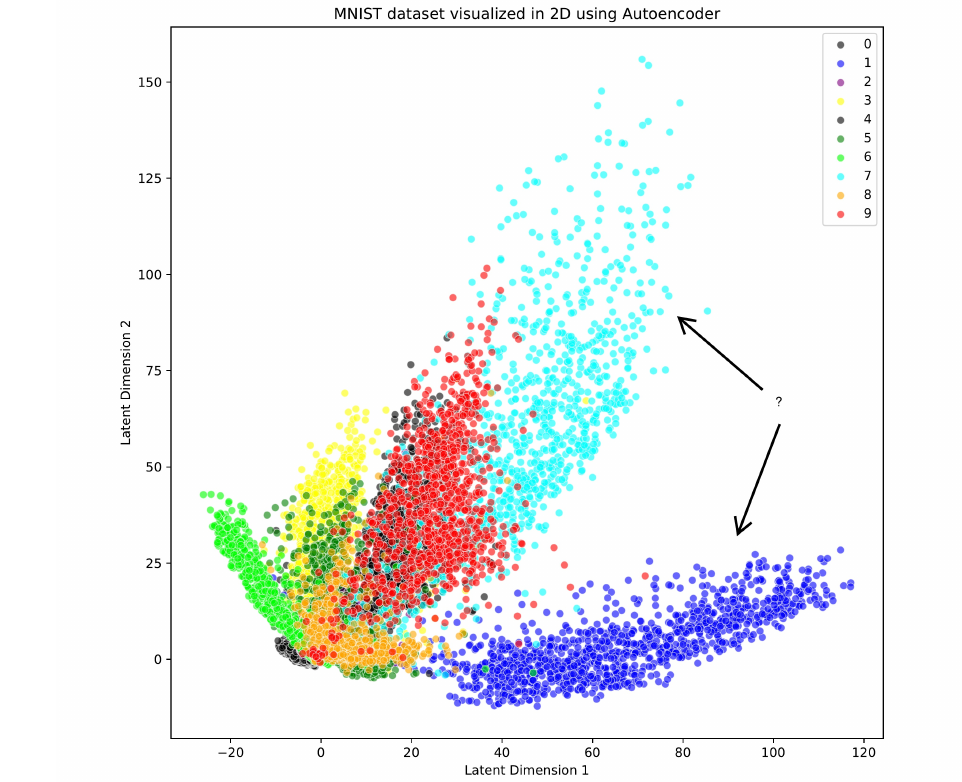

Para la interpolación sea suave el VAE se diseña en un espacio continuo. El espacio latente $z$ es continuo. Sobre este espacio continuo se muestrea para obtener objetos nuevos.  En espacio latente se generan dos vectores uno con la media y el otro con la desviación estandard ($\log \sigma²)$

Explicamos el algoritmo, inicialmente mediante un diagrama.
Figura siguiente.

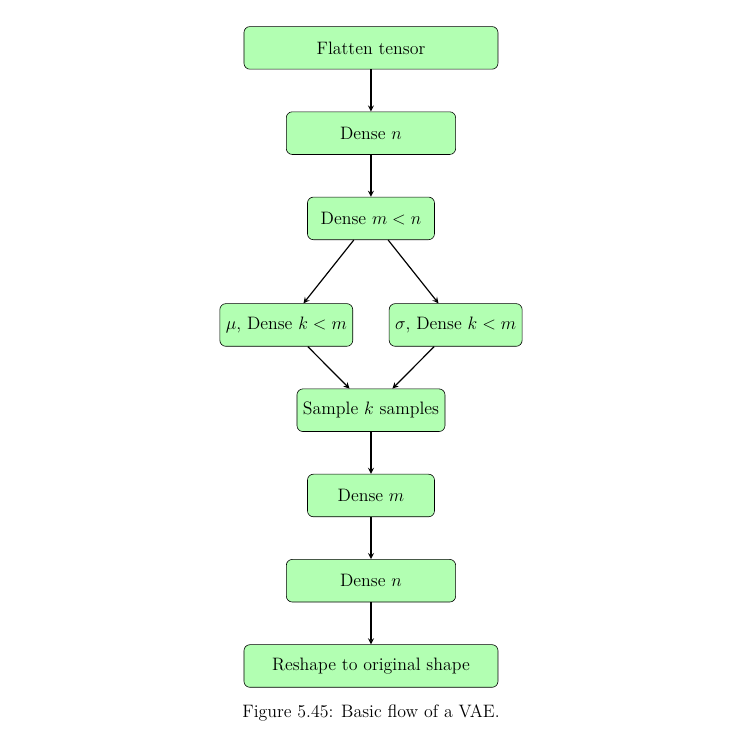

Por ejemplo asumimos las siguientes variables estocásticas
$X_1, X_2, \cdots, X_n$ a cada una de estas variables les asignamos media y desviación estandard. Asumimos un modelo MLP, y

$$\mu_i = W_\mu X_i + b_\mu $$
$$\log \sigma_i² = W_\sigma X_i + b_\sigma $$
En vez de $\sigma$ se observa que usamos $\log \sigma_i²$.
La razón es que $\sigma_i²$ es siempre positivo (o cero) y las redes neuronales funcionan mejor con nodos positivos y negativos.  A partir de $\log \sigma²$ se puede facilmente reconstruir

$$\sigma = \exp \left ( \frac12 \log ( \sigma² )     \right )  $$

Una de las razones por las cuales los VAE son ventajosos es por que mintras los vanilla AE usan punto, los VAE usan una nube Gaussiana (esto suaviza la interpolación). La Figura 5.46 ilustra esto.



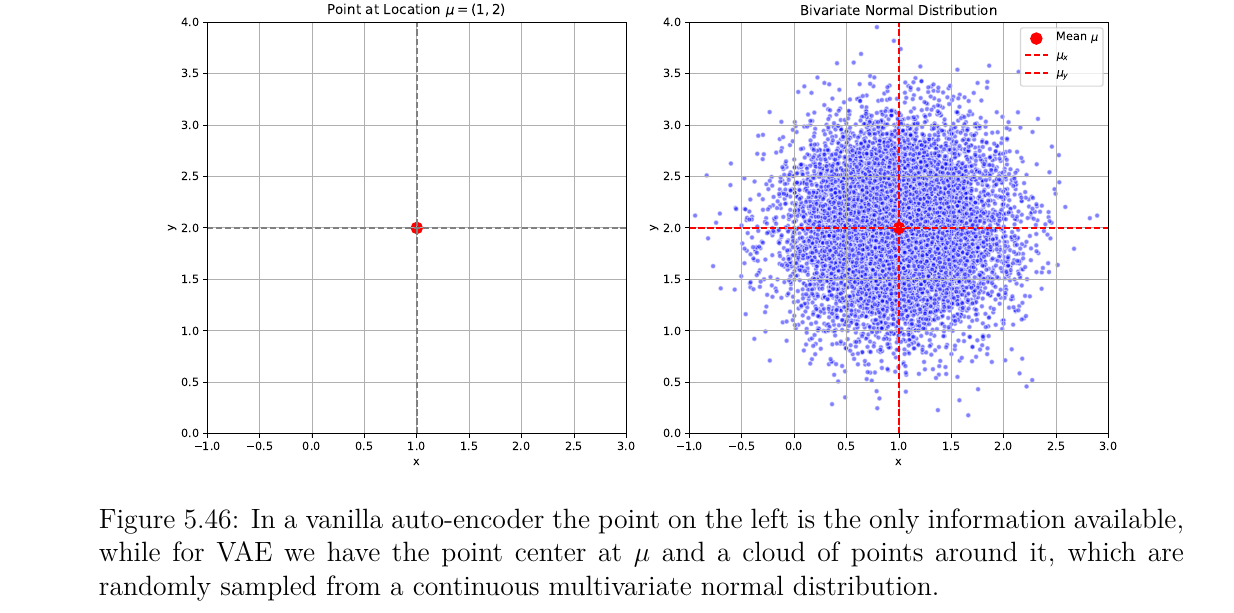

## Lenguaje matemático:
En teoría Bayesiana existe el concepto del **prior** (antes). Matemáticamente al prior lo llamamos $p(z)$.
Este **prior** (anterior) indica la probabilidad en el espacio latente $z$. También existe en la teoría Bayesiana el **posterior** (posterior) este matemáticamente se expresa mediante la fórmula $p(z | x)$.

El objeto de los VAE es aprender un parametro $\theta$ que genere nuevos datos mediante una funcion de probabilidad $p_\theta(x | z)$ en principio podemos estimar $\theta$ maximizando

$$p_\theta(x) = \int p_\theta(x | z) p(z) dz \tag{1} $$
El problema es que esta integral es "imposible" de calcular por que el espacio $z$ en general tiene muchas dimensiones (integral multi-dimensiona) ademas que no se tienen formas analiticas de $p_\theta(x | z)$.

La idea es para generar el espacio latente introducir la distribucion posterior $p_\theta(z | x )$. Esta tambien es imposible de calcular, por que

$$p_\theta(z | x) = \frac{p_\theta(x | z) p(z)}{p_\theta(x)} $$

La idea no es tener que calcular $p_\theta(z | x)$ (que es imposible) sino otra $q_\phi(z | x)$ que se va a implementar en la red.

Como siempre debemos construir una función de costo.
La función de costo va a tener dos partes

1. Reconstrucción (genera nuevos datos).
2. Kullback-Leibler divergence (KL). Es una regularización. Esta divergencia tiene el oficio de hacer el espacio latente tan próximo a una distribución normal $\mathcal{N}(0, I)$.

Asumimos que $X=\{ x_1, x_2, \cdots, x_m \}$. Pensemos en estos datos como variables aleatorias.

El proceso generativo tiene dos partes.
1. Muestrear el espacio latente con la variable $z$ y la distribucion a priori $p(z)$. En general pensaremos en una distribución Gaussiana.
2. Generamos los nuevos $\hat{x}$ con la distribucón condicional $p(x | z)$.
De nuevo, de la Ecuacion (1) queremos maximizar la likelihood marginal $p(x)$

$$p_\theta (x) = \int_D p_\theta(x | z) p(z) dz  $$
Dijimos que esta integral es "intractable".

La Figura 5.47 ilustra un resumen del proceso.

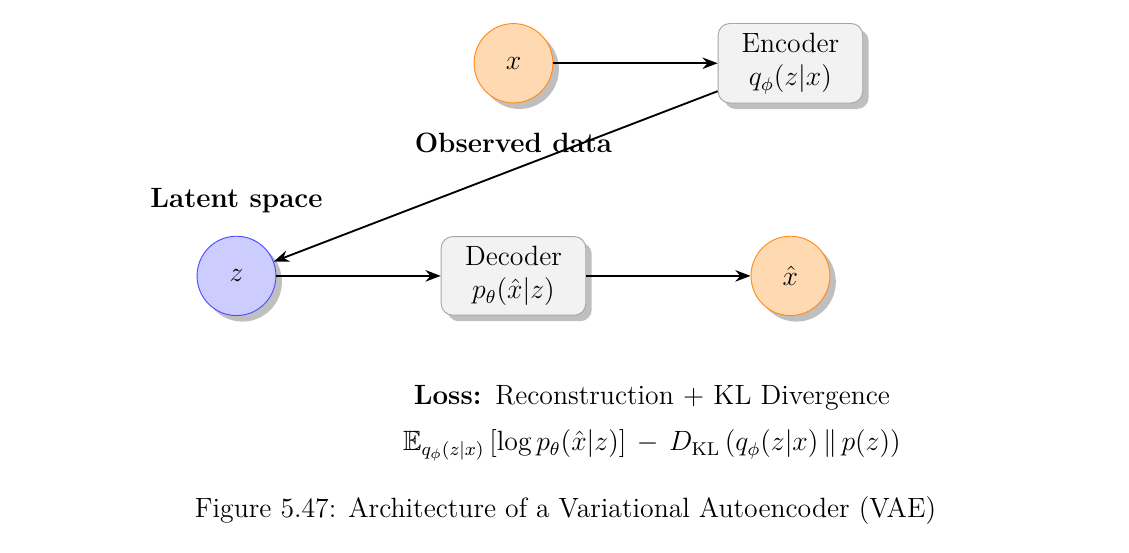

Vamos a construir la función de costo para los VAE. Queremos maximizar $p_\theta(x)$. Existe algo llamado la regla de la cadena en probabilidades

$$p(x,z) = p (x | z) p(x)  $$

En vez maximiar $p_\theta(x)$ lo hacemos con el logaritmo.

$$\log p_\theta(x) = \log \int p_\theta(x, z) dz = \log \int \frac{p_\theta(x,z)}{q_\phi(z | x)} q_\phi(z | x ) dz  \tag{2} $$

La ecuacion 2 la vamos a transformar. En el Apendice C les prueba la desigualdad de Jensen. Esta dice que si $f$ es convexa sobre una variable aleatoria $X$ entonces

$$f( \mathbb{E}[X]) \le \mathbb{E} [ f(X)]. $$

En el caso de nosotros, tenemos logaritmo que es concava. Le cambiamos el signo y es conveza.
La Ecuacion (2) es

$$\log \mathbb{E}_{q_\phi(z | x)} \left [ \frac{p_\theta(x,z)}{q_\phi(z | x)} \right ] $$

Aplicando el teorema de Jensen

$$-\log \mathbb{E}_{q_\phi(z | x)} \left [ \frac{p_\theta(x,z)}{q_\phi(z | x)} \right ] \le -\mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{p_\theta(x, z)}{q_\phi(z | x)}  \right ]$$

o

$$\log \mathbb{E}_{q_\phi(z | x)} \left [ \frac{p_\theta(x,z)}{q_\phi(z | x)} \right ] \ge \mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{p_\theta(x, z)}{q_\phi(z | x)}  \right ] $$
Lo que tenemos a la izquierda es $\log p_\theta(x)$.
Es decir

$$ \log p_\theta(x) \ge  \mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{p_\theta(x, z)}{q_\phi(z | x)}  \right ]  \tag{3} $$

Entonces vemos que
$\mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{p_\theta(x, z)}{q_\phi(z | x)}  \right ] $ es una cota inferior que podemos empujar hacia $\log p_\theta(x)$


[ELBO= Evidence Lower Bound]. El lower bound que es lo que está a la derecha en la Ecuación (3) va a ser nuestra función de costo que queremos maximizar.

$$C(\theta, \phi, x) = \mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{p_\theta(x, z)}{q_\phi(z | x)}  \right ] $$



Transformamos la función de costo $C$ a una forma mas amigable.
Recuerden el teorema de la regla de la cadena para probabilidades

$p_\theta(x,z) = p_\theta(x | z) p(z)$.

$$ \mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{p_\theta(x | z) p(z) )}{q_\phi(z | x)}  \right ] $$

En vez de maximizar quiero minimizar (para usar el gradiente en descenso, tradicional) entonces cambio el signo
Es decir

$$C(\theta, \phi, x) = -\mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{p_\theta(x, z)}{q_\phi(z | x)}  \right ] =
\mathbb{E}_{q_\phi(z | x)} \log \left [ \frac{q_\phi(z | x)}{p_\theta(x | z) p(z) } \right ] $$


\begin{eqnarray}
C(\theta, \phi, x) &=& \mathbb{E}_{q_\phi(z | x)} [ \log
q_\phi(z | x) ] - \mathbb{E}_{q_\phi(z | x)}\log p_\theta(x | z) - \mathbb{E}_{q_\phi(z | x)} [  \log  p(z)] \\
&=& - \mathbb{E}_{q_\phi(z | x)}\log p_\theta(x | z)
+ \mathbb{E}_{q_\phi(z | x)} \log \frac{q_\phi(z | x)}{p(z)} \\
&=&
 \underbrace{-\mathbb{E}_{q_{\phi}(z|x)}
  \left[ \log p_{\theta}(x|z) \right]}_{\text{reconstruction}} +
  \underbrace{D_{KL}( q_{\phi}(z | x) \parallel p(z))}_{\text{KL divergence}}
\end{eqnarray}

Todos los terminos acá se pueden explicar. Las notas los explican con detalle.

El KL Divergence

$$D_{KL} ( q_\phi(z | x) \parallel p(z) ) = \mathbb{E}_{q_{\phi(z | x)}} \log \frac{q_\phi(z | x)}{p(z)} $$
La idea es hacer el espacio latente tan proximo a una Gaussiana como esa posible. Esto lo veremos mas tarde. Esta $D_{KL}$ mide la "distancia" entre dos probabilidades con respecto a la primera (numerador). Si el radio de las dos probabilidades es 1 entonces el $\log$ es 0 y son identicas.

Se puede probar (creo que está en la tarea)

$$D_{KL}(A \parallel B) \ge 0  $$

Finalmente la función de costo es la suma sobre las funciones de costo de cada muestra.

$$J(\theta, \phi) = \frac1m \sum_{i=1}^m C(\theta, \phi, x_i) $$

La parte del $D_{KL}$ se puee probar que para todos los puntos en una distribución Gaussiana está dada por

$$D_{KL} ( q_\phi(z | x) \parallel p(z)) =
\frac12 \sum_{j=1}^d (\mu_j² + \sigma_j² - \log \sigma_j² - 1) $$
Tarea para el estudiante.  Acá $d$ es la dimensión del espacio latente.
El estudiante pregunta, por qué no la reconstrucción es

$$\| x - \hat{x} \|² $$
como en los autoencoders de vainilla.
En este caso podemos cambiar lf función de costo por
$$
C(\theta, \phi) = \frac12  (\mu² + \sigma² - \log \sigma² - 1) +  \| x - \hat{x} \|² $$
dejamos como ejercicio verificar que la reconstrucción tiene esta forma

$$ \mathbb{E}_q [ \log p_\theta(x | z) ] \approx - \| x - \hat{x} \|²$$

En la segunda parte de la clase:
* Relacionar lo que hicimos con el concepto de entropía.
* Mirar programas en `python`
 A las 8:00 pm

Vamos a relacionar un poco de el $D_{KL}$ con la entropía.
El concepto de **entropía** desde el punto de vista de teoría de la información, fue introducido por Shannon en 1948.

[73] C. E. Shannon. A mathematical theory of communication. The Bell System Technical
Journal, 27(3):379–423, 1948.

Desde el punto de vista de la información. Introducimos inicialmente el concepto de **contenido de información ** (information content). Se define como el número más pequeño de bits requeridos para describir una variable. Por ejemplo, para una variable binaria solo hay dos estados (verdadero o falso). $N=2$, se requiere solo un bit $n=1$

$$I = n = \log_2 N $$
En general  para $N=2^n$ entonces, se requieren $n$ bits.
Hasta 1024 se requieren 10 bits.
Pensando en probabilidades

$$p(x) = \frac{1}{N} = \frac{1}{2^n} $$
El contenido de información acá es

$$I(x) = -\log_2 p(x) = - \log_2 \frac{1}{N} = -\log_2 \frac{1}{2^n} = -(-n) = n. $$

Lo interesante de esta úlitma ecuación es que trabaja en el continuo. $x$ puede ser una variable continua. La base no tiene que ser 2.
La entropía $H(x)$ se define como

$$H(X) = \mathbb{E}( I(x)) = -\sum_{i=1}^n p(x_i) \log p(x) $$
Donde $X$ es una variable discreta sobre un conjunto $\{ x_1, x_2, \cdots, x_n \}$
Si fuera continua

$$H(x) = \mathbb{E}(I(x)) =-\int p(x) \log p(x) dx $$

Como relacionamos esto con $D_{KL}$. Recuerde

$$D_{KL} ( P \parallel Q) = \int p(x) \log \frac{p(x)}{q(x) }dx = \int p(x) [ \log p(x) - \log q(x) ]  $$
pues $\log a/b = \log a - \log b$
lo que vemos es que el $D_{KL}$ es un **entropía relativa**.



## El reparametrization trick (truco de reparametrización).
El "sampling" se da en el espacio latente. Se da con la siguiente formula.

$$z = \mu + \sigma \circ \epsilon. $$
donde $\epsilon$ es un ruido con distribución normal $\mathcal{N}(0, I)$.

Para que se hace esto? es por la propagación hacia atrás. No podemos sacar el gradiente el ruido $\epsilon$.

Veamos varias gráficas para ilustrar esto.
La Figura 5.48 ilustra un diagrama de flujo, modificado de la Figura 5.45.

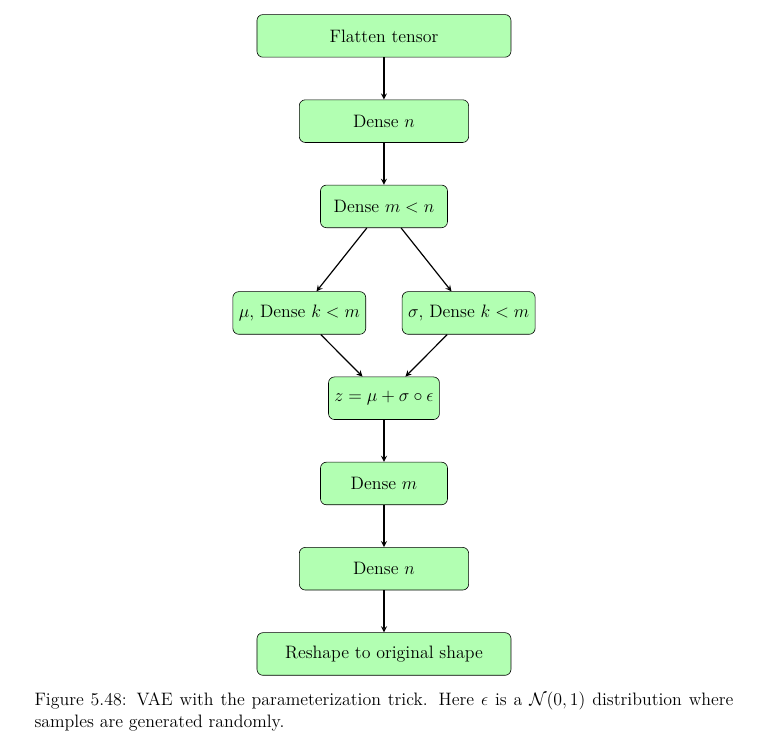

La Figura 5.49 muestra por que es importante "parametrization trick ".



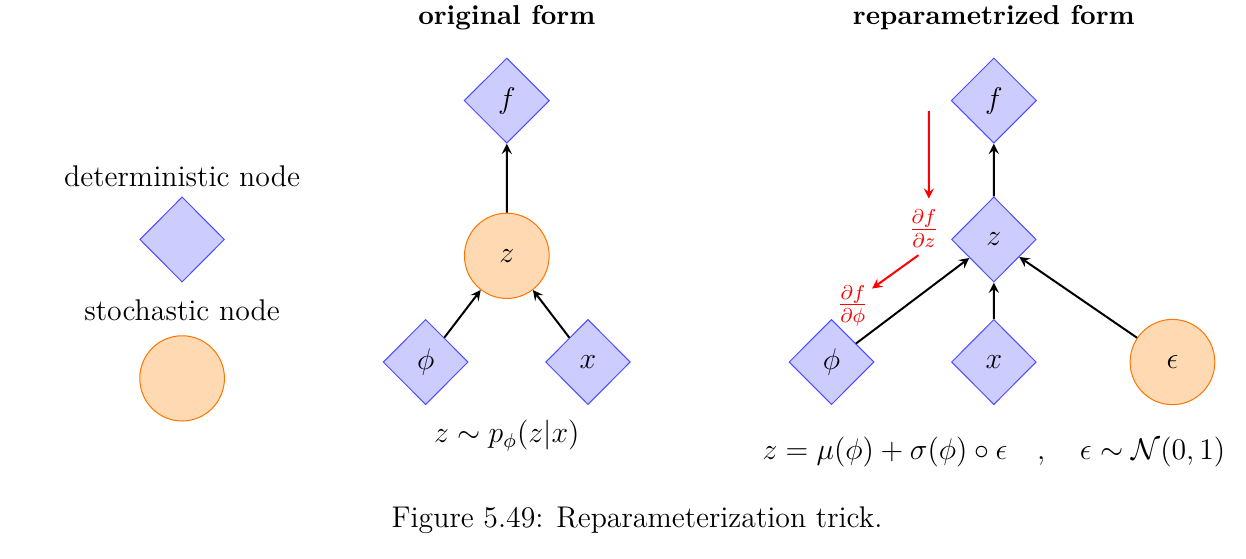

Implementación.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_labels = np.concatenate([y_train, y_test], axis=0) # Load labels as well
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

# Define VAE model
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")
encoder.summary()

decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(decoder_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            batch = tf.shape(z_mean)[0]
            dim = tf.shape(z_mean)[1]
            epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
            z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

# Train the VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

# Project MNIST data to 2D
z_mean, _ = encoder.predict(mnist_digits)



Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 14, 14,    │        320 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3136)      │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 16)        │     50,192 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - kl_loss: 2.2636 - loss: 211.8345 - reconstruction_loss: 209.5709
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - kl_loss: 3.7303 - loss: 169.7651 - reconstruction_loss: 166.0348
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 3.7445 - loss: 161.4024 - reconstruction_loss: 157.6580
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - kl_loss: 3.7875 - loss: 157.9296 - reconstruction_loss: 154.1421
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 3.8247 - loss: 155.8740 - reconstruction_loss: 152.0493
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 3.8545 - loss: 154.4970 - reconstruction_loss: 150.6425
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 3.8531 - loss: 153.4075 - reconstruction_loss: 149.5544
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - kl_loss: 3.8658 - loss: 152.6769 - reconstruction_loss: 148.8110
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms

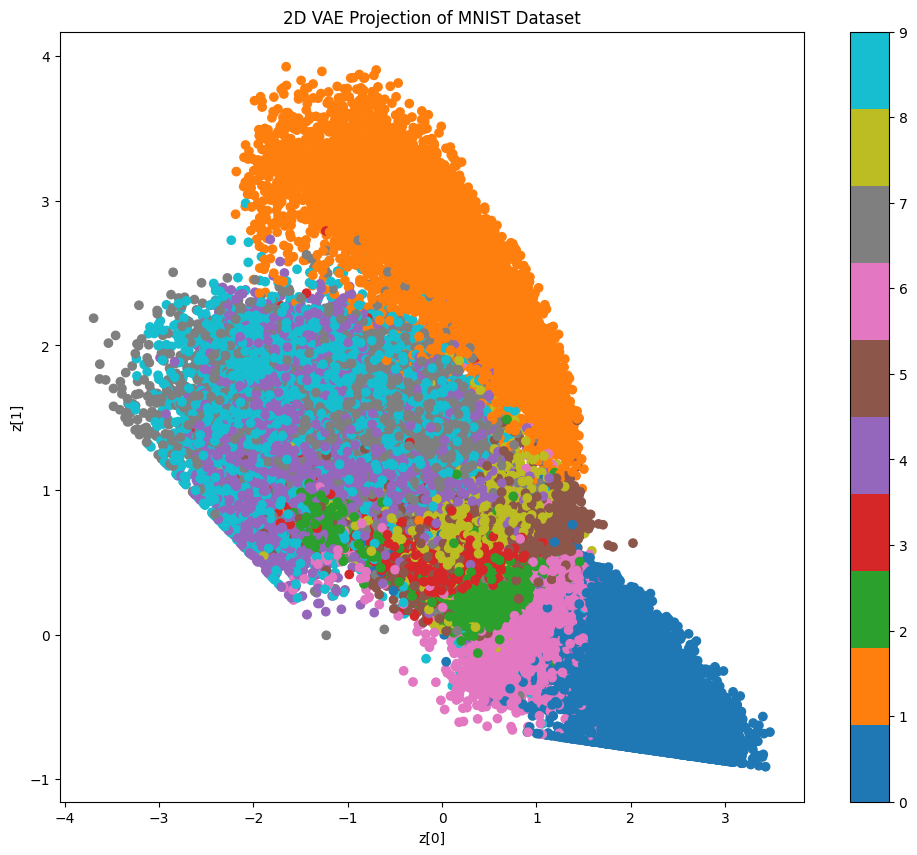

In [3]:
# Visualize the 2D projection
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=mnist_labels, cmap='tab10') # Use mnist_labels for coloring
plt.colorbar()
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title("2D VAE Projection of MNIST Dataset")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

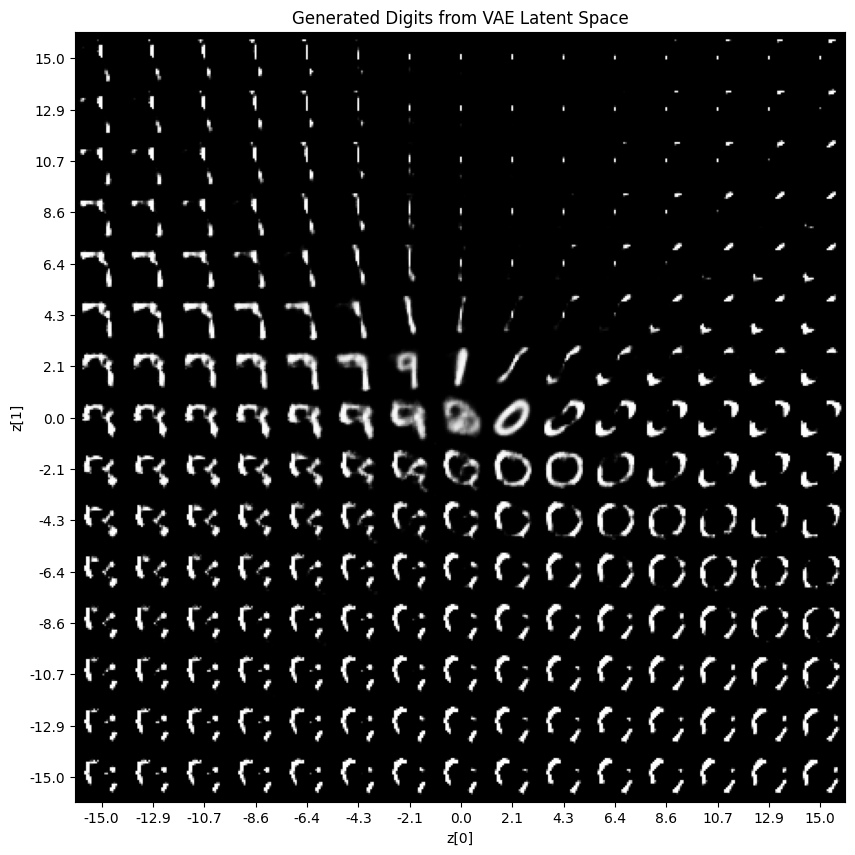

In [11]:
# Generate new digits
n = 15 # Number of digits to generate
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Create a grid of latent variable values
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)[::-1]

# Decode for each point in the grid
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap='Greys_r')
plt.title("Generated Digits from VAE Latent Space")
plt.show()

Using device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 19.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.19MB/s]


[01/8] train: loss=159.0286 (bce=142.2248, kl=16.8038) | val:   loss=110.7401 (bce=86.9632, kl=23.7769)
[02/8] train: loss=107.5687 (bce=82.4806, kl=25.0881) | val:   loss=104.6093 (bce=79.1150, kl=25.4942)
[03/8] train: loss=103.9890 (bce=78.4432, kl=25.5458) | val:   loss=102.7666 (bce=77.2480, kl=25.5186)
[04/8] train: loss=102.2376 (bce=76.7096, kl=25.5280) | val:   loss=101.2095 (bce=75.5866, kl=25.6229)
[05/8] train: loss=101.1258 (bce=75.6052, kl=25.5205) | val:   loss=100.1470 (bce=74.3135, kl=25.8335)
[06/8] train: loss=100.4105 (bce=74.9472, kl=25.4633) | val:   loss=99.6232 (bce=73.9992, kl=25.6240)
[07/8] train: loss=99.7052 (bce=74.3643, kl=25.3409) | val:   loss=99.1518 (bce=73.7354, kl=25.4164)
[08/8] train: loss=99.2287 (bce=73.8905, kl=25.3382) | val:   loss=98.6735 (bce=73.4407, kl=25.2328)


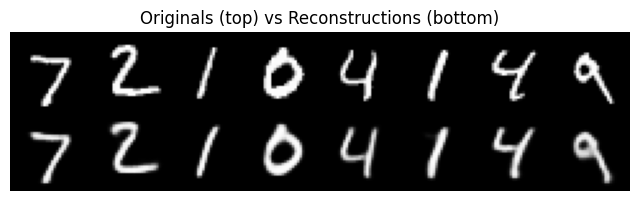

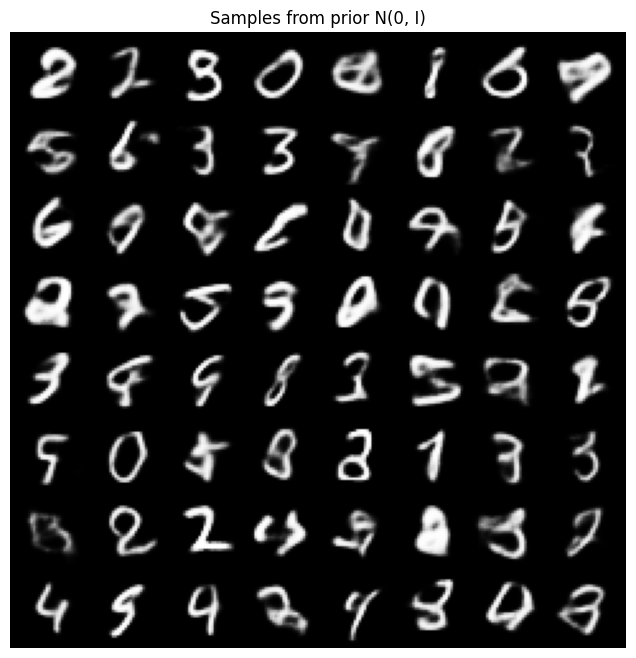

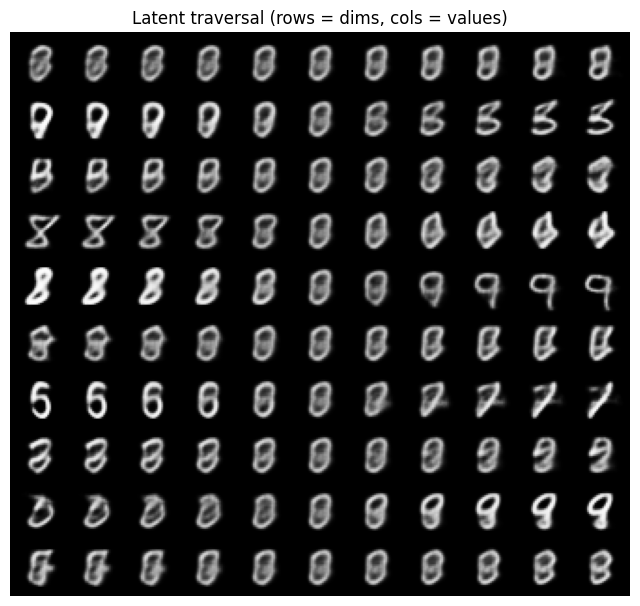

Images saved in: /content/outputs


In [12]:
# codigo generado con ChatGPT.
# VAE on MNIST (PyTorch) — Notebook-friendly, no argparse.
# - Trains a CNN-VAE
# - Displays reconstructions, prior samples, and a latent traversal
# - Saves PNGs to ./outputs/
# If you have a GPU in Colab: Runtime > Change runtime type > GPU.

import math
from pathlib import Path
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms
from torchvision.utils import save_image, make_grid

import matplotlib.pyplot as plt

# -------------------------
# Config (edit if you want)
# -------------------------
SEED         = 42
EPOCHS       = 8         # Increase if you want better samples
BATCH_SIZE   = 128
LR           = 1e-3
LATENT_DIM   = 20
DATA_DIR     = "./data"
OUT_DIR      = "./outputs"

# -------------------------
# Reproducibility
# -------------------------
def set_seed(seed=SEED):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
set_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

# -------------------------
# Data
# -------------------------
transform = transforms.ToTensor()  # MNIST is already [0,1]
train_ds = torchvision.datasets.MNIST(root=DATA_DIR, train=True,  transform=transform, download=True)
test_ds  = torchvision.datasets.MNIST(root=DATA_DIR, train=False, transform=transform, download=True)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# -------------------------
# Model
# -------------------------
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, 4, stride=2, padding=1),  # 1x28x28 -> 32x14x14
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, 4, stride=2, padding=1), # 32x14x14 -> 64x7x7
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),# 64x7x7  -> 128x7x7
            nn.ReLU(inplace=True),
        )
        self.flat = 128 * 7 * 7
        self.fc_mu = nn.Linear(self.flat, latent_dim)
        self.fc_logvar = nn.Linear(self.flat, latent_dim)

    def forward(self, x):
        h = self.net(x)
        h = h.view(x.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.fc = nn.Linear(latent_dim, 128 * 7 * 7)
        self.net = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),  # 128x7x7 -> 64x14x14
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),   # 64x14x14 -> 32x28x28
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 1, 3, stride=1, padding=1)              # 32x28x28 -> 1x28x28 (logits)
        )

    def forward(self, z):
        h = self.fc(z)
        h = h.view(z.size(0), 128, 7, 7)
        logits = self.net(h)
        return logits

class VAE(nn.Module):
    def __init__(self, latent_dim=LATENT_DIM):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    @staticmethod
    def reparameterize(mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        logits = self.decoder(z)
        return logits, mu, logvar

    @torch.no_grad()
    def generate(self, n, device):
        z = torch.randn(n, self.latent_dim, device=device)
        logits = self.decoder(z)
        return torch.sigmoid(logits)

# -------------------------
# Loss (negative ELBO)
# -------------------------
def elbo_loss(x, logits, mu, logvar, reduction="sum"):
    # Reconstruction: BCE with logits (stable)
    bce = F.binary_cross_entropy_with_logits(logits, x, reduction=reduction)
    # KL(q||p) where p=N(0,I)
    kl = 0.5 * torch.sum(mu.pow(2) + logvar.exp() - logvar - 1.0)
    return bce + kl, bce, kl

# -------------------------
# Training & Eval
# -------------------------
def train_epoch(model, loader, optimizer, device):
    model.train()
    total = total_bce = total_kl = 0.0
    for x, _ in loader:
        x = x.to(device)
        optimizer.zero_grad()
        logits, mu, logvar = model(x)
        loss, bce, kl = elbo_loss(x, logits, mu, logvar, reduction="sum")
        loss.backward()
        optimizer.step()
        total += loss.item()
        total_bce += bce.item()
        total_kl += kl.item()
    n = len(loader.dataset)
    return {"loss": total/n, "bce": total_bce/n, "kl": total_kl/n}

@torch.no_grad()
def eval_epoch(model, loader, device):
    model.eval()
    total = total_bce = total_kl = 0.0
    for x, _ in loader:
        x = x.to(device)
        logits, mu, logvar = model(x)
        loss, bce, kl = elbo_loss(x, logits, mu, logvar, reduction="sum")
        total += loss.item()
        total_bce += bce.item()
        total_kl += kl.item()
    n = len(loader.dataset)
    return {"loss": total/n, "bce": total_bce/n, "kl": total_kl/n}

def show_grid(img_tensor, nrow=8, title=None):
    # img_tensor is in [0,1] (B,C,H,W)
    grid = make_grid(img_tensor, nrow=nrow, padding=2)
    npimg = grid.detach().cpu().numpy()
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    if title:
        plt.title(title)
    plt.imshow(npimg.transpose(1,2,0), cmap='gray')
    plt.show()

# -------------------------
# Init & Train
# -------------------------
model = VAE(LATENT_DIM).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

best_val = float("inf")
history = {"train": [], "val": []}

for epoch in range(1, EPOCHS+1):
    tr = train_epoch(model, train_loader, optimizer, device)
    va = eval_epoch(model, test_loader, device)

    history["train"].append(tr)
    history["val"].append(va)

    print(f"[{epoch:02d}/{EPOCHS}] "
          f"train: loss={tr['loss']:.4f} (bce={tr['bce']:.4f}, kl={tr['kl']:.4f}) | "
          f"val:   loss={va['loss']:.4f} (bce={va['bce']:.4f}, kl={va['kl']:.4f})")

    # Save best checkpoint
    if va["loss"] < best_val:
        best_val = va["loss"]
        torch.save({"epoch": epoch,
                    "model_state": model.state_dict(),
                    "optimizer_state": optimizer.state_dict(),
                    "val_loss": best_val},
                   Path(OUT_DIR) / "best_vae.pt")

# -------------------------
# Reconstructions
# -------------------------
with torch.no_grad():
    x, _ = next(iter(test_loader))
    x = x.to(device)
    logits, _, _ = model(x)
    xhat = torch.sigmoid(logits)

# Show & save top-8 originals vs reconstructions
recon_grid = torch.cat([x[:8], xhat[:8]], dim=0).cpu()
show_grid(recon_grid, nrow=8, title="Originals (top) vs Reconstructions (bottom)")
save_image(make_grid(recon_grid, nrow=8, padding=2),
           Path(OUT_DIR) / "reconstructions.png")

# -------------------------
# Prior Samples
# -------------------------
with torch.no_grad():
    samples = model.generate(64, device).cpu()

show_grid(samples, nrow=8, title="Samples from prior N(0, I)")
save_image(make_grid(samples, nrow=8, padding=2),
           Path(OUT_DIR) / "samples.png")

# -------------------------
# Latent Traversal (first up to 10 dims)
# -------------------------
@torch.no_grad()
def latent_traversal(model, steps=11, scale=3.0):
    L = min(model.latent_dim, 10)
    vals = torch.linspace(-scale, scale, steps, device=device)
    rows = []
    for d in range(L):
        z = torch.zeros(steps, model.latent_dim, device=device)
        z[:, d] = vals
        logits = model.decoder(z)
        rows.append(torch.sigmoid(logits).cpu())
    return torch.cat(rows, dim=0)

trv = latent_traversal(model, steps=11, scale=3.0)
show_grid(trv, nrow=11, title="Latent traversal (rows = dims, cols = values)")
save_image(make_grid(trv, nrow=11, padding=2),
           Path(OUT_DIR) / "latent_traversal.png")

print(f"Images saved in: {Path(OUT_DIR).resolve()}")

# GANs: Generative Adversarial Networks.
El trabajo se desarrolló  por Ian J. Goodfellow et al. 2014

[27] Ian Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley,
Sherjil Ozair, Aaron Courville, and Yoshua Bengio. Generative adversarial nets. In
Z. Ghahramani, M. Welling, C. Cortes, N. D. Lawrence, and K. Q. Weinberger, edi-
tors, Advances in Neural Information Processing Systems 27, pages 2672–2680. Curran
Associates, Inc., 2014.

Los GANs consisten en 2 redes.

* La red discriminadora $D$
* La red generadora $G$.

Piense en el detective ($D$) y el falsificador $G$.
El falsificador falsica (Genera) una firma (falsa),
el detective $D$ debe decir si es real o "fake". (1, 0).

Ahi interacción entre ambos. Inicialmente el generador genera ruido y para el detective es fácil identificar que la firma es falsa. Pero mediante el entrenamiento, el generador $G$ receive "feedback" del detective y aprende. La probabilidad de mejorar es buena. Veamos el concepto en gráficas.

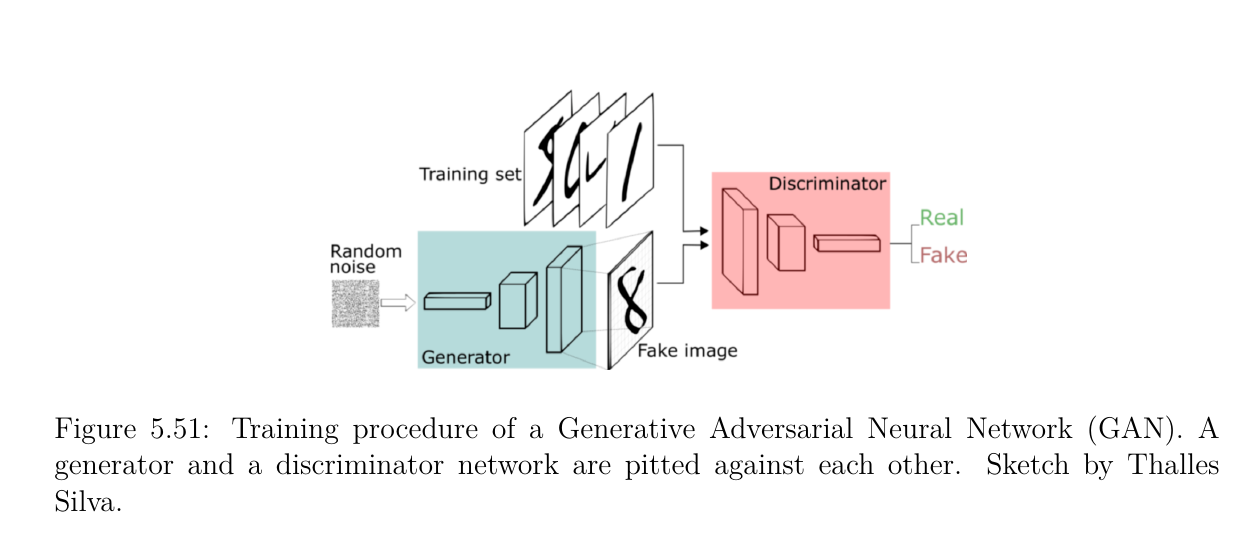

La Figura 5.51 ilustra GANs. La explique oralmente.

La Figura 5.52 es mas estadística. Al fin y al cabo los GANS manejan probabilidades. La explico oralmente.

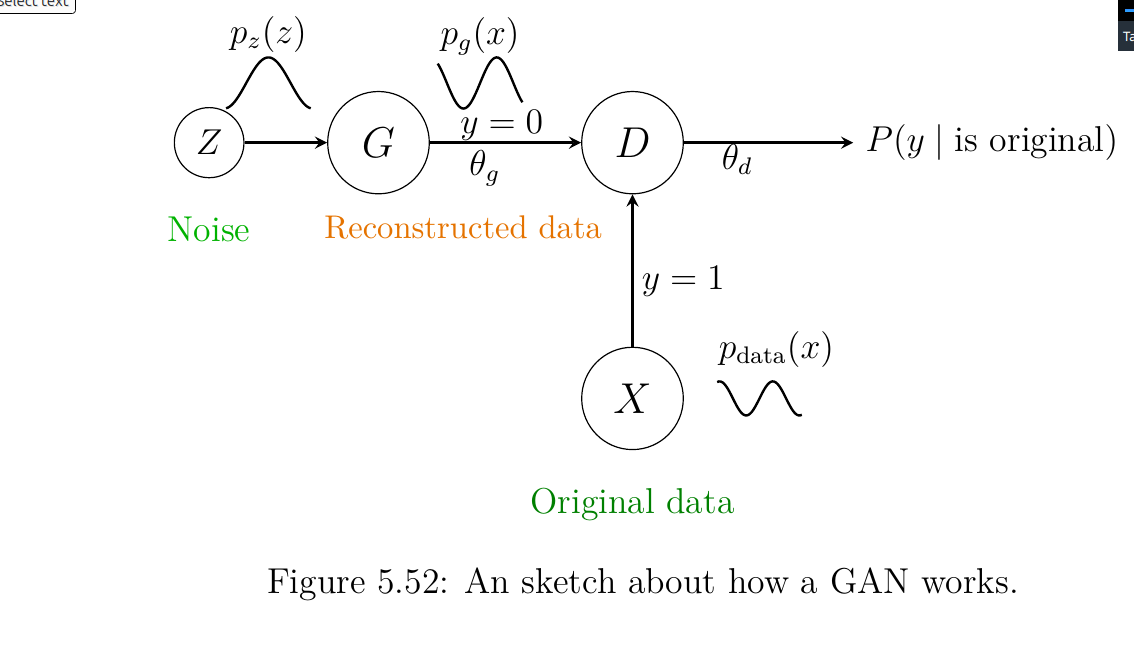

El link
[this person does not exist](https://thispersondoesnotexist.com/)  usa GANs para generar caras no existentes de personas no existentes.

## Matemática de los GANS (comienzo).
Queremos construir la función de costo para los GANs.
Iniciamos con la siguiente función de costo que es como un
cross-entropy.

$$\log D(x) + \log (1 - D( G(z)) $$
Cuando $x$ es una muestra real, $z$ es "fake ".
El Discriminador $D$ quiere maximizar esta función.

De otro lado para el generador quiere minizar

$$\log (1 - D(G(z)) $$

Todo esto corresponde a una sola muestra. Como tenemos un conjunto de muestras debemos usar una medida que puede ser la esperanza.

Para el discriminador queremos maximizar

$$\mathbb{E}_{x \sim p_{data}} [ \log D(x)] + E_{z \sim p} [ \log (1 - D(G(z))] \tag{4}$$

La Ecuacion (4) se calcula en el discreto con la fomula

$$\sum_{i=1}^m \log D(x_i) p_{data(x)} + [ \log (1 - D(G_{z_i})] p(z) $$

Hasta donde vamos esta es la función de costo (pérdida) para el discriminador. Seguimos en 8 dias.
